In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [17]:
df_competencia = pd.read_pickle("../data/limpieza/hoteles_competencia_completo.pkl")
df_propios = pd.read_pickle("../data/limpieza/hoteles_propios.pkl")
df_final = pd.read_pickle("../data/final/hoteles_final.pkl")

# INSIGHTS

1. PRECIOS
2. VALORACION
3. VALORACIONS VS PRECIO
4. GENERAL
5. FECHAS
5. TOP 10

### 1. PRECIOS

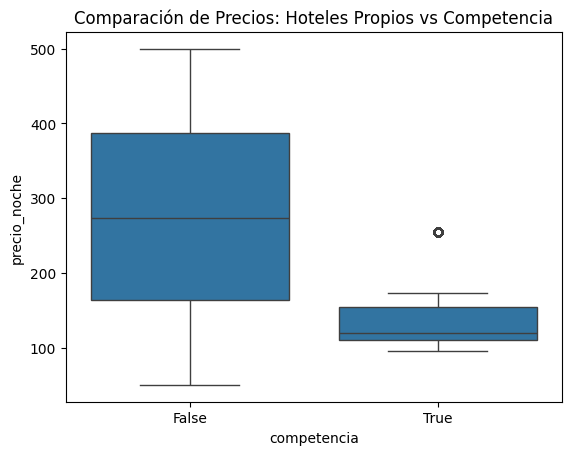

In [19]:
sns.boxplot(data=df_final, x="competencia", y="precio_noche")
plt.title("Comparación de Precios: Hoteles Propios vs Competencia")
plt.show()


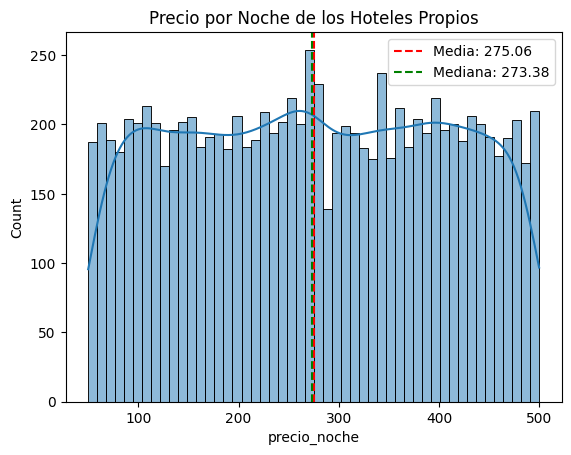

In [ ]:
media = np.mean(df_propios["precio_noche"])
mediana = np.median(df_propios["precio_noche"])

sns.histplot(df_propios["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles Propios")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

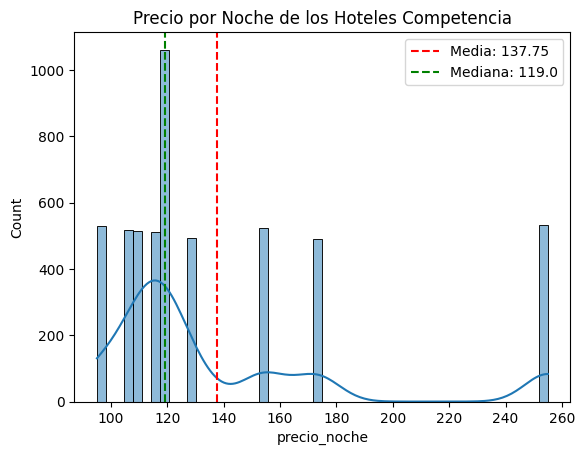

In [ ]:
media = np.mean(df_competencia["precio_noche"])
mediana = np.median(df_competencia["precio_noche"])

sns.histplot(df_competencia["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles Competencia")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

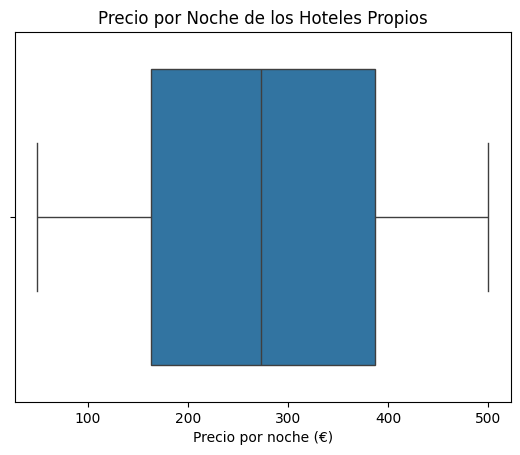

In [ ]:
sns.boxplot(x=df_propios["precio_noche"])
plt.title("Precio por Noche de los Hoteles Propios")
plt.xlabel("Precio por noche (€)")
plt.show()

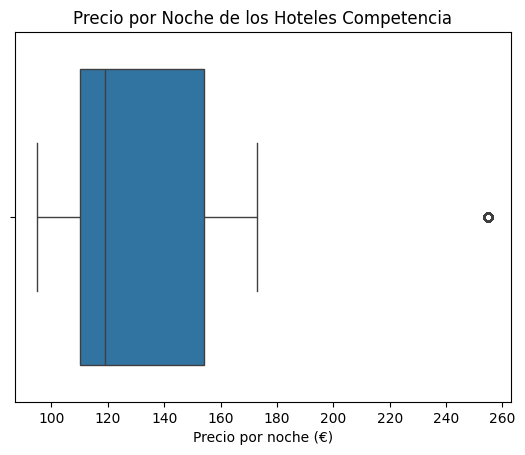

In [ ]:
sns.boxplot(x=df_competencia["precio_noche"])
plt.title("Precio por Noche de los Hoteles Competencia")
plt.xlabel("Precio por noche (€)")
plt.show()

### 2. VALORACION

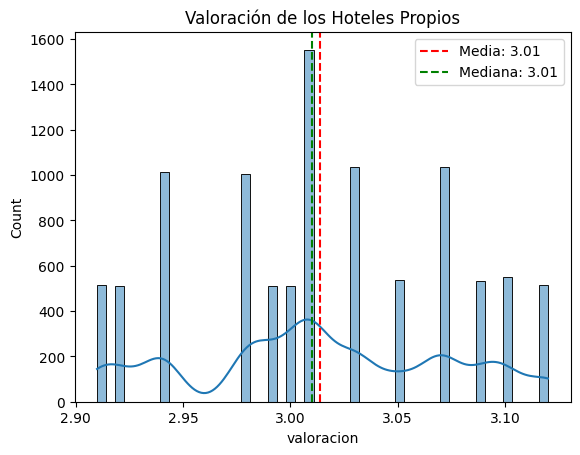

In [ ]:
media = np.mean(df_propios["valoracion"])
mediana = np.median(df_propios["valoracion"])

sns.histplot(df_propios["valoracion"], bins=50, kde=True)
plt.title("Valoración de los Hoteles Propios")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

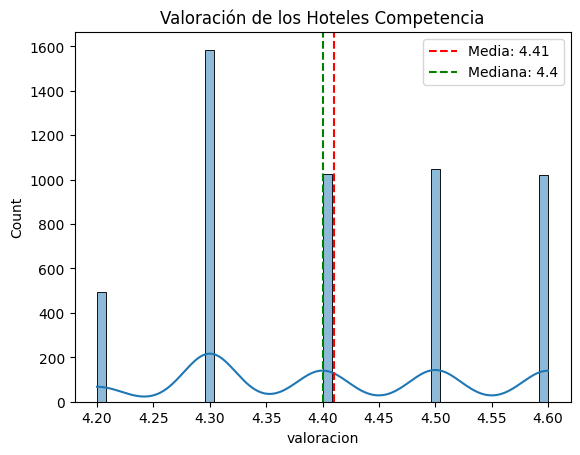

In [ ]:
media = np.mean(df_competencia["valoracion"])
mediana = np.median(df_competencia["valoracion"])

sns.histplot(df_competencia["valoracion"], bins=50, kde=True)
plt.title("Valoración de los Hoteles Competencia")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

### 3. RELACION VALORACION VS COMPETENCIA

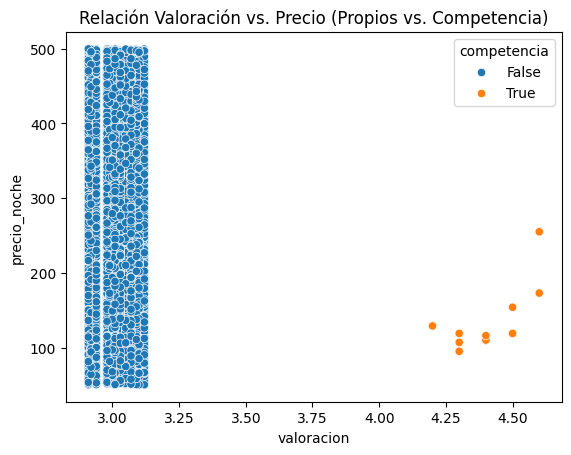

In [23]:
sns.scatterplot(data=df_final, x="valoracion", y="precio_noche", hue="competencia")
plt.title("Relación Valoración vs. Precio (Propios vs. Competencia)")
plt.show()


### 4. HOTELES GENERAL

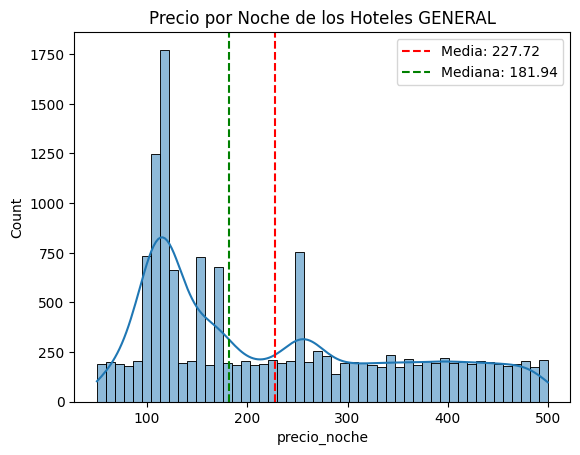

In [33]:
media = np.mean(df_final["precio_noche"])
mediana = np.median(df_final["precio_noche"])

sns.histplot(df_final["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

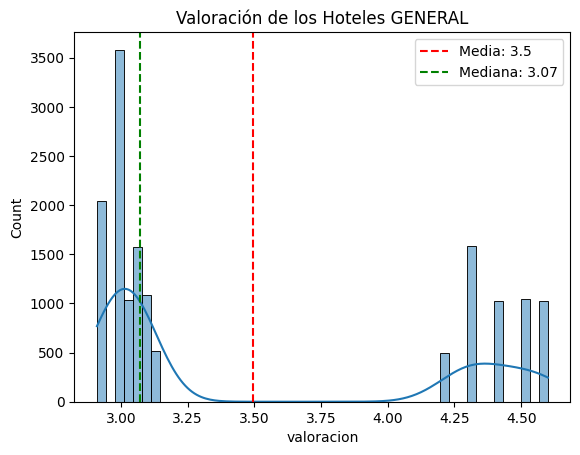

In [35]:
media = np.mean(df_final["valoracion"])
mediana = np.median(df_final["valoracion"])

sns.histplot(df_final["valoracion"], bins=50, kde=True)
plt.title("Valoración de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

### 5. RESERVAS

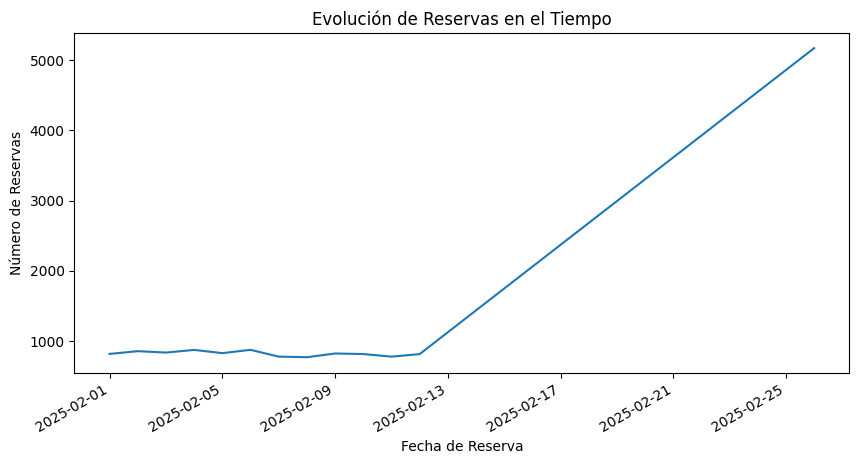

In [ ]:
reservas_por_dia = df_final.groupby("fecha_reserva")["id_reserva"].count()
reservas_por_dia.plot(kind="line", figsize=(10,5))
plt.title("Evolución de Reservas en el Tiempo")
plt.ylabel("Número de Reservas")
plt.xlabel("Fecha de Reserva")
plt.show()


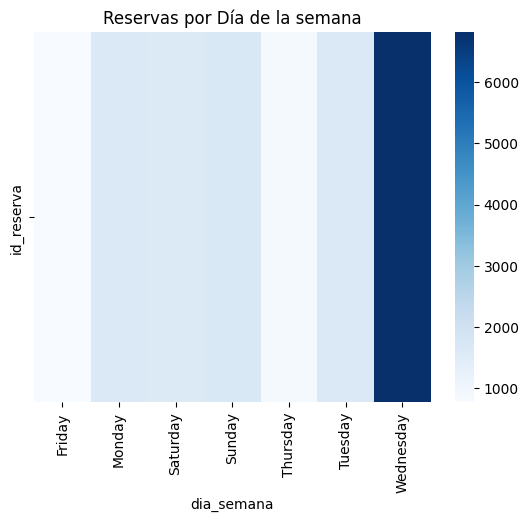

In [ ]:
df_final["dia_semana"] = df_final["fecha_reserva"].dt.day_name()
pivot_data = df_final.pivot_table(columns="dia_semana", values="id_reserva", aggfunc="count")
sns.heatmap(pivot_data, cmap="Blues")
plt.title("Reservas por Día de la semana")
plt.show()


### 6. TOP 10

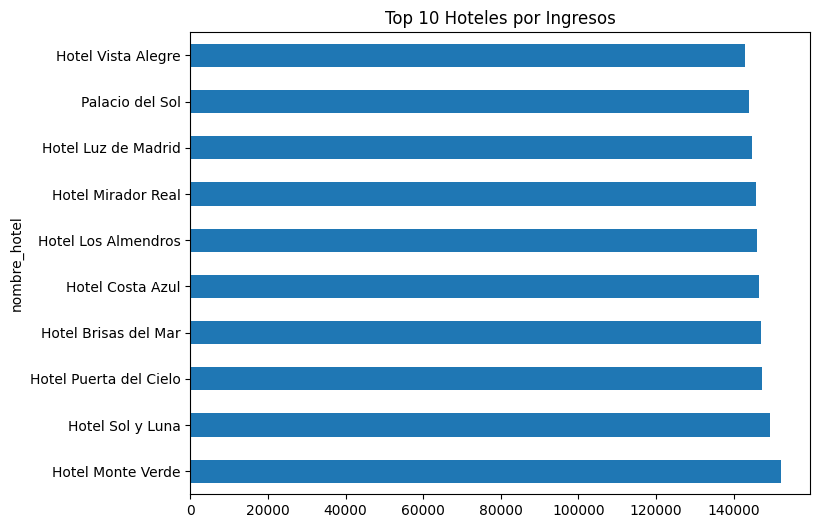

In [ ]:
df_final["ingreso_reserva"] = df_final["precio_noche"] * (df_final["final_estancia"] - df_final["inicio_estancia"]).dt.days
ingresos_hoteles = df_final.groupby("nombre_hotel")["ingreso_reserva"].sum().sort_values(ascending=False).head(10)
ingresos_hoteles.plot(kind="barh", figsize=(8,6))
plt.title("Top 10 Hoteles por Ingresos")
plt.show()


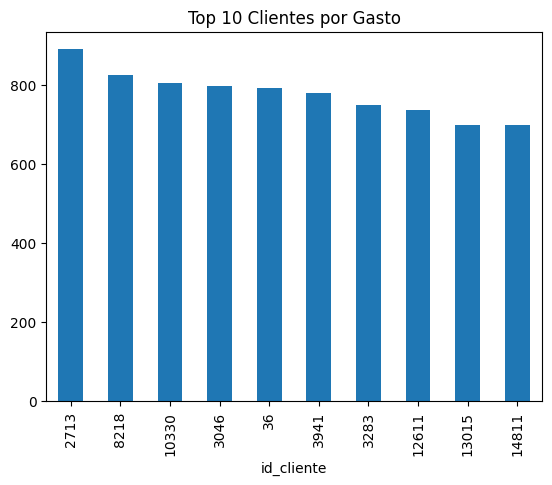

In [ ]:
gasto_por_cliente = df_final.groupby("id_cliente")["ingreso_reserva"].sum()
top_10_clientes = gasto_por_cliente.sort_values(ascending=False).head(10)
top_10_clientes.plot(kind="bar", title="Top 10 Clientes por Gasto")
plt.show()
